## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import keras
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(1)

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [5]:
x_train[0].shape

(28, 28)

In [6]:
import numpy as np
np.bincount(y_train).shape

(10,)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
trainY=keras.utils.to_categorical(y_train,num_classes=10)

In [8]:
trainY.shape

(60000, 10)

In [0]:
testY=keras.utils.to_categorical(y_test)

In [10]:
testY.shape

(10000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

Done Reshaping in previous step.

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [14]:
  # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, testY), callbacks=callback_list)
    


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.3717 - acc: 0.8648 - val_loss: 0.2891 - val_acc: 0.8959
Epoch 2/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.2279 - acc: 0.9161 - val_loss: 0.2475 - val_acc: 0.9107
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.1651 - acc: 0.9384 - val_loss: 0.2448 - val_acc: 0.9135
Epoch 4/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.1142 - acc: 0.9571 - val_loss: 0.2807 - val_acc: 0.9130
Epoch 5/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0755 - acc: 0.9722 - val_loss: 0.2947 - val_acc: 0.9179
Epoch 6/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0510 - acc: 0.9812 - val_loss: 0.3614 - val_acc: 0.9134
Epoch 7/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0369 - acc: 0.9864 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [15]:

    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.5))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, testY), callbacks=callback_list)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.4743 - acc: 0.8297 - val_loss: 0.3153 - val_acc: 0.8866
Epoch 2/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.3213 - acc: 0.8839 - val_loss: 0.2652 - val_acc: 0.9033
Epoch 3/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.2772 - acc: 0.8984 - val_loss: 0.2573 - val_acc: 0.9041
Epoch 4/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.2518 - acc: 0.9075 - val_loss: 0.2411 - val_acc: 0.9104
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.2294 - acc: 0.9154 - val_loss: 0.2283 - val_acc: 0.9158
Epoch 6/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.2110 - acc: 0.9206 - val_loss: 0.2379 - val_acc: 0.9155
Epoch 7/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.2010 - acc: 0.9263 - val_loss: 0.2223 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

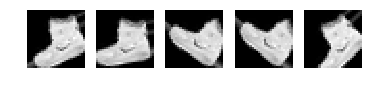

In [17]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [21]:
 # Define Model
    model4 = Sequential()

    # 1st Conv Layer
    model4.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model4.add(Activation('relu'))

    # 2nd Conv Layer
    model4.add(Convolution2D(32, 3, 3))
    model4.add(Activation('relu'))

    # Max Pooling
    model4.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model4.add(Dropout(0.25))

    # Fully Connected Layer
    model4.add(Flatten())
    model4.add(Dense(128))
    model4.add(Activation('relu'))
    
    # More Dropout
    model4.add(Dropout(0.5))

    # Prediction Layer
    model4.add(Dense(10))
    model4.add(Activation('softmax'))

    # Loss and Optimizer
    model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model4.fit_generator(datagen.flow(x_train, trainY, batch_size=BATCH_SIZE), nb_epoch=EPOCHS,samples_per_epoch=x_train.shape[0], 
              validation_data=(x_test, testY), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validat

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9583 - acc: 0.6480 - val_loss: 0.5972 - val_acc: 0.7717
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7233 - acc: 0.7286 - val_loss: 0.5473 - val_acc: 0.7963
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6601 - acc: 0.7539 - val_loss: 0.5287 - val_acc: 0.8008
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6270 - acc: 0.7666 - val_loss: 0.4860 - val_acc: 0.8204
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6044 - acc: 0.7761 - val_loss: 0.4677 - val_acc: 0.8260
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5813 - acc: 0.7844 - val_loss: 0.4379 - val_acc: 0.8418
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5647 - acc: 0.7930 - val_loss: 0.4195 - val_acc: 0.8488
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [24]:
model4.evaluate(x_test,testY)

10000/10000 [==============================] - 1s 57us/step


[0.4418986359357834, 0.8431]